# Deep learning from scratch: homework 1

## Xiaoyi Liu 3046670

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

---

In [1]:
# import necessary library for this exercise
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

#### <span style="color:#a50e3e;">Exercise 3. </span>  Apply gradient descent to minimize the Least Squares cost for linear regression on a low dimensional dataset

In this exercise you will perform gradient descent to minimize the Least Squares cost function for linear regression, first using the following toy data.

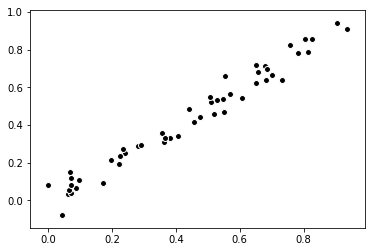

In [2]:
# data input
csvname = '2d_linregress_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:,:-1].T
y = data[:,-1:] 

# scatter plot the input data
plt.figure()
plt.scatter(x,y,color = 'k',edgecolor = 'w')
plt.show()

Copy the gradient descent code given in [Section 6.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/6_First_order_methods/6_4_Gradient_descent.html), and code for computing the Least Squares cost from [Section 8.1.3 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/8_Linear_regression/8_1_Least_squares_regression.html) in the cells below.  Make sure you understand how each of these code blocks is written prior to using them!

Once you have copied over the code, determine optimal parameters of the best fit line for the dataset above by minimizing the Least Squares cost via gradient descent.  Choose a steplength parameter properly of the form $10^{-\gamma}$  by using the cost function history plot.  Use at most $1000$ iterations

Plot the resulting fit of your best run's weights to the dataset above.  Use the following small random initialization when you perform your gradient descent run. 

 ```w = 0.1*np.random.randn(2,1)```

In [3]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

In [14]:
# compute linear model of input point
def model(x_p,w):
    # stack a 1 onto the top of each input 
    x_p = np.vstack((1,x_p))   
        
    # compute linear combination and return
    a = np.dot(x_p.T,w)
    return a

In [4]:
# a least squares function for linear regression
def least_squares(w):
    P = len(y)
    cost = 0
    for p in range(P):
        # get pth input/output pair
        x_p = x[:,p][:,np.newaxis]
        y_p = y[p]

        ## add to current cost
        cost += (model(x_p,w)  - y_p)**2
        
    # return average least squares error
    return cost/float(P)

In [5]:
w = 0.1*np.random.randn(2,1)

In [33]:
max_iters = 1000

In [44]:
learning_rate = 0.1

In [45]:
weight_history,cost_history = gradient_descent(least_squares, learning_rate, max_iters, w)

In [47]:
x_t = np.linspace(0,1,50)
y_t = [(weight_history[max_iters][0] + weight_history[max_iters][1]*x_t[n]) for n in range(len(x_t))]

In [48]:
plt.plot(x_t, y_t)
plt.scatter(x.T,y)

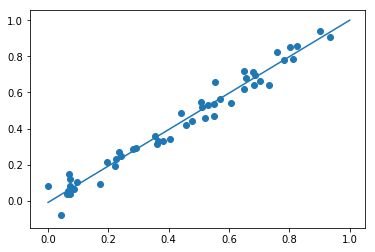

In [49]:
plt.show()

**------ HINT ------**

How can you produce the best fit line resulting from a run of gradient descent?  Say the following set of weights provided the smallest cost function value for your run

\begin{equation}
\mathbf{w}^{\star} = \begin{bmatrix} w_0^{\star} \\ w_1^{\star} \end{bmatrix}
\end{equation}

then to create a point on your best fit line you input a new test point $x_{test}$ and plug it into your best fit line giving the corresponding output

\begin{equation}
y_{test} =  w_0^{\star} +  w_1^{\star}x_{test}
\end{equation}

Note in how we have written the `Python` code for Least Squares this output $y_{test}$ can be invoking the `model` function as 

\begin{equation}
y_{test} = \text{model}\left(x_{test},\mathbf{w}^{\star}\right)
\end{equation}

This pair $\left(x_{test},y_{test}\right)$ is a point on your best fit line.  To visualize the best fit line evaluate a good number of evenly spaced test inputs over the range of the training data (100 or 200 should suffice), plug them into your fully trained model, and plot the resulting points.